# Spectrograms, Applied to Human Speech

Name: Ricky Small

Student ID: G00352166

Institution: Galway Mayo Institute of Technology

Course Title: BEng (Hons) Software and Electronic Engineering

Module: Digital Signal Processing

Lecturer: Michelle Lynch

## Introduction to Spectrograms

A spectrogram provides a visual representation of the strength of a signal over the time domain at different frequencies, that are present in a digital signal. [1] Depending on the signal being transformed, there are different names used to identify the spectrogram. For this report, an audio file containing vocals of both female and male have been recorded for use. This type of spectrogram is commonly known as a voiceprint or voicegram. However, if the audio contained non-vocals it would be also known as a sonogram. [2] Usually, a spectrogram is a two-dimensional graph displayed with frequency over time, with a third colour map scale element representing the magnitude/amplitude. Three-dimensional transformations are also used for more complex signals this can be also referred to as spectrogram waterfalls.

## Signals

### What are signals?
As mentioned, spectrograms are visual representations of signals, but what exactly is a signal? 

Signals in the modern day are thought to be ways of receiving internet, phone reception (signal) and even television channels through an antenna or satellite. Although this is to be true, they have been far more common in society before the introduction of mentioned technologies.  For example, the lighting of fires on hilltops to warn of approaching enemies was recognised as a smoke signal, which is one of the oldest forms of long-distance and visual communication. Shouting 'Fire' to inform people nearby there is fire would also be considered as a signal of warning, while also being a vocal signal.

When we look at the definition for a signal we find multiple references that have different meanings [3]

1. a movement or sound that you make to give somebody information, instructions, a warning, etc.
2. a piece of equipment that uses different coloured lights to tell drivers to go slower, stop, etc., used especially on railways and roads
3. a series of electrical waves that carry sounds, pictures or messages, for example to a radio, television or mobile phone
4. an event, an action, a fact, etc. that shows that something exists or is likely to happen

However, what we can gather from the definitions is that there is a source of information that is transmitted, that is received in some sort of form by a recipient. 

Another useful thing about signals is that they can all be represented by some visual graphs known as waveforms which allow more data to be acquired depending on the formulas that have been used against them, when we create a waveform based on the time domain we get a very familiar-looking type known as a sound wave.

### The Human Voice

The human voice is complex and varies between individuals. When somebody talks and another person hears/listens this in itself is known as a vocal signal. There is a source that transmits(speech) and a recipient that listens(receives). The human voice could be known as an analogue signal as it can be continuous with reference to time, with unrestricted amplitudes or frequencies. When somebody speaks the vocal signal is transmitted at the speed of sound as an acoustic wave, which is then received by the listener's eardrums that theoretically decodes the wave into vibrations which are then converted to words through the human brains memory of sound.[4]

When we as humans listen to a female and male speaking, we can generally assume which sex the speech belongs to. This is due to females generally speaking at a higher frequency when compared to males. Baring in mind all that we know about the human voice it would be very hard to determine the frequency or pitch range unless it was to a trained ear.

Using a digital audio file formats which in the case of this report is WAV, we can convert the analogue signal into a digital dignal which will allow the user to sample and take measurements to determine specific data that the human ear cannot easily be determined. Also once the vocal audio is in a digital format it can then be used to calculate and teach machine learning systems such as artificial intelligence(A.I) to perform vocal recognition which would be complex yet manageable with the data acquired. This is all possible by the means of the ability to represent signals as waveforms.

# Code

In [41]:
import numpy as np
import IPython
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import IPython.display as ipd
import os
import librosa
female_hello_how_are_you = ('./Human_Voice_samples/female_hello_how_are_you.wav')
male_hello_how_are_you = ('./Human_Voice_samples/male_hello_how_are_you.wav')

_We import numpy the python number library as np in order to make calculations matplotlib.pyplot is imported in order to plot out the final transformations scipy is the scientific module use to read signals, scipy.io is the IO library allowing WAV files to be read in._

In [42]:
ratefemale, audiofemale = wavfile.read(female_hello_how_are_you)

<ipython-input-42-2c178c7a0f86>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  ratefemale, audiofemale = wavfile.read(female_hello_how_are_you)


In [43]:
ratemale, audiomale = wavfile.read(male_hello_how_are_you)

<ipython-input-43-f1a1d20189f6>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  ratemale, audiomale = wavfile.read(male_hello_how_are_you)


## Female Vocal - Hello, how are you?

In [44]:
ipd.Audio(female_hello_how_are_you)

In [45]:
audiofemale = np.mean(audiofemale, axis=1)
Nf = audiofemale.shape[0]            
Lf = Nf / ratefemale
print(f' Female Audio length: {Lf:.2f} seconds')

 Female Audio length: 1.25 seconds


_as the audio signal is in stereo we used the above line of code (np.mean(audiofemale, axis=1)) to find the average of the two channels to create a mono file._ 

Nf = number of samples

Lf = length of the signal

_dividing the shape of the sou8nd array by the rate of the WAV file, allows the precise length of the audio to be determined._

### Male Vocal - Hello, how are you?

In [46]:
ipd.Audio(male_hello_how_are_you)

In [47]:

audiomale = np.mean(audiomale, axis=1)
Nm = audiomale.shape[0]            
Lm = Nm / ratemale
print(f' Male Audio length: {Lm:.2f} seconds')

 Male Audio length: 1.25 seconds


as the audio signal is in stereo we used the above line of code (np.mean(audiofemale, axis=1)) to find the average of the two channels to create a mono file.

Nm = number of samples

Lm = length of the signal

dividing the shape of the sou8nd array by the rate of the WAV file, allows the precise length of the audio to be determined.

## Time domain waveform Calculations

In [48]:
# Function to plot the female audio in time-domain
def plot_time_domain_female():
    fig_f = plt.figure(figsize=(9,7))
    ax_f = fig_f.add_subplot(111)
    ax_f.plot(np.arange(Nf) / ratefemale, audiofemale)
    ax_f.set_title('Female - Hello, how are you', fontsize=26, pad=10, color='sienna');
    ax_f.set_xlabel('Time (s)', fontsize=20, labelpad=10)
    ax_f.set_ylabel('Amplitude', fontsize=20, labelpad=10);
        
    
# Function to plot the male audio in time-domain
def plot_time_domain_male():
    fig_m = plt.figure(figsize=(9,7))
    ax_m = fig_m.add_subplot(111)
    ax_m.plot(np.arange(Nm) / ratemale, audiomale)
    ax_m.set_title('Male - Hello, how are you', fontsize=26, pad=10, color='sienna');
    ax_m.set_xlabel('Time (s)', fontsize=20, labelpad=10)
    ax_m.set_ylabel('Amplitude', fontsize=20, labelpad=10);

_To plot the original inputted signal, the figure size is set, and identification labels for the axis and title_

## Plotting Time domain waveform

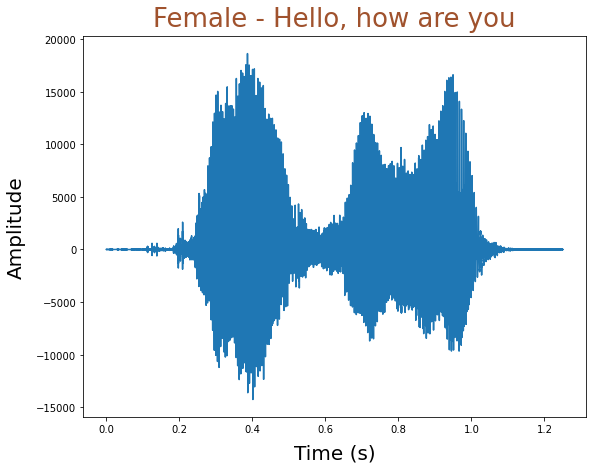

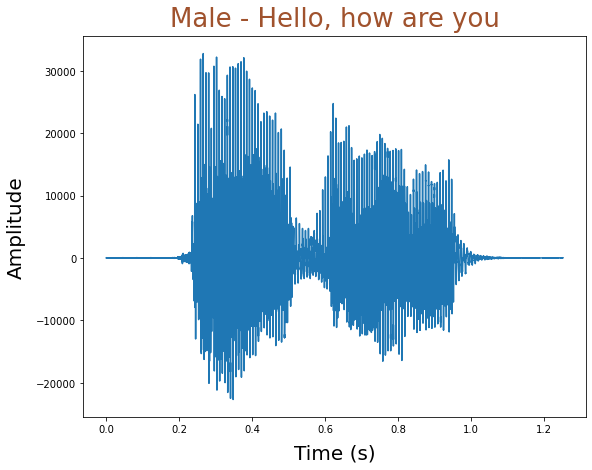

In [49]:
def plot_time_domain_female_and_male():
    plot_time_domain_female();
    plot_time_domain_male();
plot_time_domain_female_and_male()

_In the time-domain waveforms above we can see some similarities between them. We know both females and males are speaking the same phrase "Hello, How are you?", so this simplifies the process of breaking down the waveform visually. Both amplitudes decrease around 0.5seconds and increase again around 0.65. This drop represents the pause in between the word "Hello" and "How". However, as this is a waveform of amplitude over time, the waveforms audio could be any sound that falls within this range._

# Formulas

## Discrete Fourier Transform (DFT)

In a simple explanation, the DFT equation mathematically does to a digital signal what the human ear is doing when it hears a sound. It breaks down the sound into frequencies to make sense of the audio.

With a continuous signal over infinite time, we can apply the Fourier transform (FT) the gather an average of frequencies within the signal. When we come to audio signals there are multiple frequencies at the same time which need to be obtained. Instead of using infinite times we can take a discrete signal of a finite time interval and calculate the frequencies present.  For instance, a composition or music track could be two minutes long, so it makes more sense to just use the two minutes worth of samples.[5]

So we know that DFT transforms a finite sequence of samples, that are evenly spaced in a certain quantity of a signal often referred to as a function. It is a representation of the frequency domain, based on the inputted signal. [6] with enough samples gathered a signal can be reconstructed with a higher resolution.

$$\Large{\hat{x}(k) = \sum_{n=0}^{N-1}x(n)·e^{-i{2\pi n}{\frac{k}N}}}$$

The formula above in its exponential form is used to calculate the DFT.  We use the following parameters to transform the inputted signal.
  
$\hat{x}(k)$ is the resulting DFT of the waveform, where k is the proxy

$N$ relates to the number of samples across the signal

$n$ is the indexing time

$x(n)$ represents the whole signal

$e$ is Euler's number which is a constant number

$i$ represents an imaginary number, which is calculated as the $\sqrt{-1}$

To get the value of the Sine wave, Eulers is used to obtain the sum of multiple complexes of the sine wave, which results in the Real sine waves value.

After we apply the DFT to the signal we will be provided with a vector of frequency bins.

In [65]:
female, sample_rate = librosa.load(os.path.join(female_hello_how_are_you))
male, sample_rate = librosa.load(os.path.join(male_hello_how_are_you))

female_ft = np.fft.fft(female)
male_ft = np.fft.fft(male)

magnitude_spectrum_female = np.abs(female_ft)
magnitude_spectrum_male = np.abs(male_ft)

def plot_magnitude_spectrum(signal, title, sr, f_ratio=1):
    ft = np.fft.fft(signal)
    magnitude_spectrum = np.abs(ft)
    
    # plot magnitude spectrum
    plt.figure(figsize=(18,5))
    
    frequency = np.linspace(0, sr, len(magnitude_spectrum))
    num_frequency_bins = int(len(frequency) * f_ratio)
    
    plt.plot(frequency[:num_frequency_bins], magnitude_spectrum[:num_frequency_bins])
    plt.xlabel("Frequncy (Hz)")
    plt.title(title)
    
    plt.show()


As useful as the DFT equation is within digital signal processing, especially audio processing. It presents a problem where the time of present frequencies has been lost in the transform. As a spectrogram is a visual representation of the amplitude of frequencies over time, it would be impossible to create a spectrogram using the DFT equation solely. What we can create is the spectrum of the signal. The signal is converted to the waveform, then using the DFT we obtain the spectrum. So how can the time be represented with the frequencies of the signal?

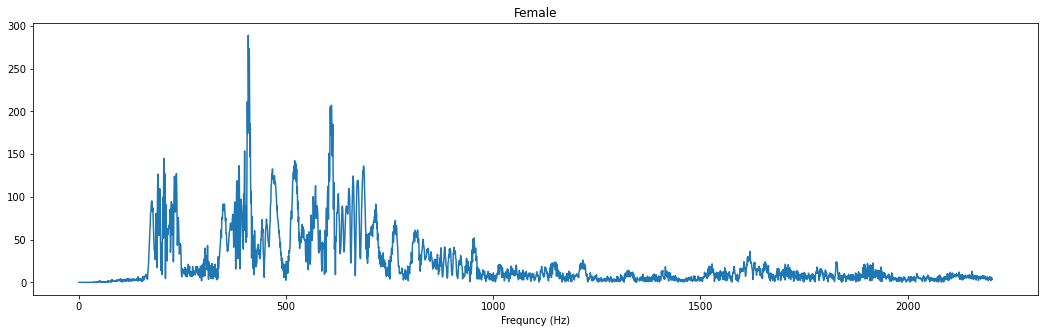

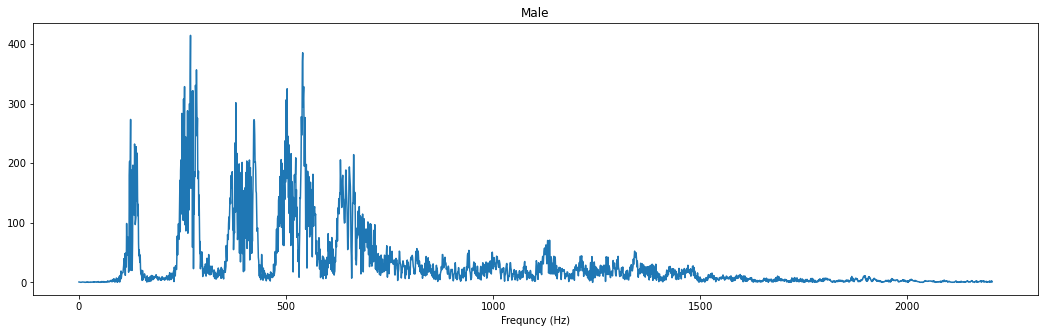

In [66]:
plot_magnitude_spectrum(female, "Female", sample_rate, 0.1)
plot_magnitude_spectrum(male, "Male", sample_rate, 0.1)

_Above we can see the spectrumresult while running the Fourier Transfom on a discrete signal of both female and male audio files_

## Short Time Fourier Transform (STFT)

As previously mentioned, when performing the DFT on a signal, the time domain is lost, which makes it difficult to create a spectrogram. That is where Short Time Fourier Transform (STFT) becomes very useful in determining the time that the magnitude of the frequency takes place. 

The method of STFT will take the input signal and split it into short segments referred to as frames. These frames are isolated in what is known as "windows". The DFT is then applied to each frame within the window. An overlap between windows occurs to retain all the information from the sources signal. Overlapping the windows of the signal using the sliding window effect allows for the segments data to be correctly synced. Overlapping also makes sure that no frequencies of the signal have been lost between windows, allowing the signal to be sampled and/or reconstructed as close to the original as possible. 

By setting the hop size we tell the window how much to move forward to start the next window. [7] For example, if the frame size was 1024, and the overlap was 50% then the window would advance by 512 each time. This is a very useful method when an audio signal changes frequency over a short period in this case the human voice is a great example. [8]


$$\Large{S(m, k) = \sum_{n=0}^{N-1}x(n+mH)·w(n)·e^{-i{2\pi n}{\frac{k}N}}}$$


$S(m, k)$ - S depends on m which represents the time (frame number), k is the frequency

$N$ - Equal to the frame size

$x(n+mH)$ - represent the signal in the current frame (n = the sample number in the frame, mH = starting sample of frame(m = current frame, H = hop size))

$w(n)$ - the windowing function

$e$ is Euler's number which is a constant number

$i$ represents an imaginary number, which is calculated as the $\sqrt{-1}$

After we apply the DFT to the signal we will be provided with a matrix of frequency bins and frames

<div>
<img src="./Human_Voice_samples/Short-time-Fourier-transform-STFT-overview.png" width="400"/>
</div>

_Above is a visual representation showing the signal, windows and segmentation as explained above_ [11]

### Time/Frequency Trade off

There is a trade-off to be considered when using STFT which depends on the application being processed.

As the frame size is increased the frequency resolution increases, this is due to more frequency bins being generated. Meanwhile, the time resolution decreases as there is more time due to the large frame size.

Alternatively, as the frame size decreases the frequency resolution decreases as fewer bins are generated, yet the time resolution increases as there is less time being transformed with smaller frame size. [9]

## Spectrogram Calculations

In [63]:
# Spectrogram calculation using scipy for female audio
freqs_sp_f, times_sp_f, spec_sp_f = signal.spectrogram(audiofemale, fs=ratefemale, window='hanning',
                                                 nperseg=1024, noverlap=1024-100,
                                                 detrend=False, scaling='spectrum')
spec_db_sp_f = 10*np.log10(spec_sp_f)
    
# Function to plot the female spectrogram
def plot_spec_scipy_female():
    fig_f, ax_f = plt.subplots(figsize=(15,7))
    im_f = ax_f.pcolormesh(times_sp_f, freqs_sp_f/1000, spec_db_sp_f, vmax=spec_db_sp_f.max(), vmin=30, cmap=plt.cm.get_cmap('nipy_spectral',10), linewidth=10, shading='auto')
    cb_f = fig_f.colorbar(im_f, ax=ax_f, orientation="vertical")
    ax_f.set_ylabel('Frequency (kHz)', fontsize=26, labelpad=10)
    ax_f.set_xlabel('Time (s)', fontsize=26, labelpad=10);
    ax_f.set_title('Female Spectrogram', fontsize=26, pad=10, color='sienna');
    ax_f.set_ylim(0, 3.5)
    ax_f.tick_params(axis='both', which='both', labelsize=22, length=0)
    cb_f.set_label('Power (dB)', fontsize=26, labelpad=10)
    cb_f.ax.tick_params(labelsize=22)


# Spectrogram calculation using scipy for male audio
freqs_sp_m, times_sp_m, spec_sp_m = signal.spectrogram(audiomale, fs=ratemale, window='hanning',
                                                 nperseg=1024, noverlap=1024-100,
                                                 detrend=False, scaling='spectrum')
spec_db_sp_m = 10*np.log10(spec_sp_m)
    
# Function to plot the male spectrogram
def plot_spec_scipy_male():
    fig_m, ax_m = plt.subplots(figsize=(15,7))
    im_m = ax_m.pcolormesh(times_sp_m, freqs_sp_m/1000, spec_db_sp_m, vmax=spec_db_sp_m.max(), vmin=30, cmap=plt.cm.get_cmap('nipy_spectral',10), linewidth=10, shading='auto')
    cb_m = fig_m.colorbar(im_m, ax=ax_m, orientation="vertical")
    ax_m.set_ylabel('Frequency (kHz)', fontsize=26, labelpad=10)
    ax_m.set_xlabel('Time (s)', fontsize=26, labelpad=10);
    ax_m.set_title('Male Spectrogram', fontsize=26, pad=10, color='sienna');
    ax_m.set_ylim(0, 3.5)
    ax_m.tick_params(axis='both', which='both', labelsize=22, length=0)
    cb_m.set_label('Power (dB)', fontsize=26, labelpad=10)
    cb_m.ax.tick_params(labelsize=22)

Parameters required to create the spectrogram

_Audio = audio file
Freq Sample = rate calculated when the wav file is read into the system
Window= ‘hanning’ 
nperseg = number of samples per segment	
noverlap = 1024-100  or npreseg-100_

_Logscale is preformed as it is better for this process, compared to using Linear scale_

_To plot the spectrogram, the figure size is set, and identification labels for the axis and title, the range is set based on the inputted signal, and a colour map to easily identify the different dB of the signal trnasformed_

## Plotting Spectrograms

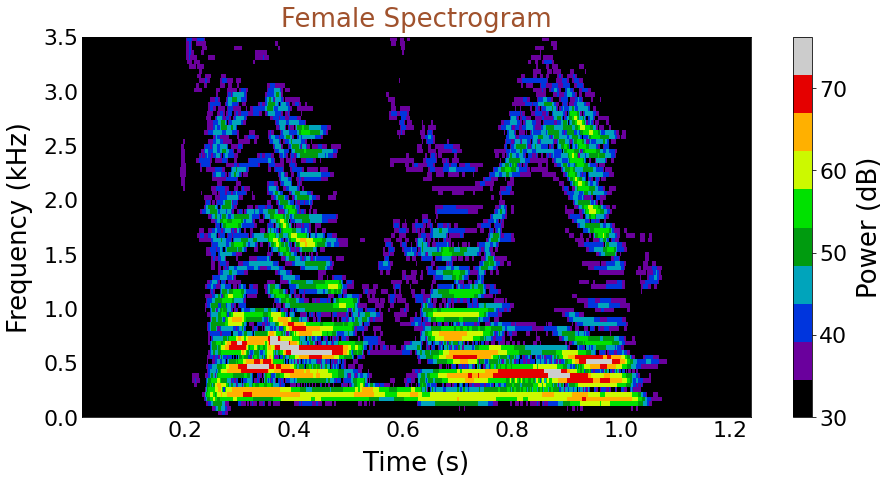

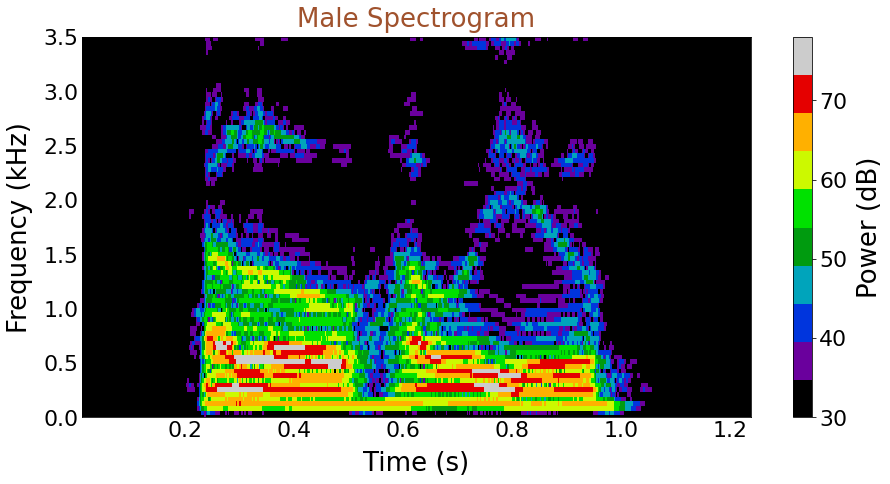

In [60]:
def plot_spec_female_and_male():
    plot_spec_scipy_female();
    plot_spec_scipy_male();    
plot_spec_female_and_male();

_In the above Spectrograms of both female and male, we can see there again is similarities between each. As noted previously females generally speak with a higher frequency when compared to males.[10] Notably, this can be seen for instance between 0.8seconds and 1second.  

The peak of the harmonic sits around 2kHz for the male whereas with the male it is higher at 2.5-3 kHz.  Although the Power/Amplitude has different peaks, the Spectrograms have a similar pattern.[11] 

Each individual speaks with a different accent and volume, yet the words and letters of the same language are all pronounced in the same pattern. The harmonics are easier to see in the females as the words are spoken with a higher pitch. Formants are areas where there is a lot of energy in a frequency, this generally tends to be present more in males vocals making it easier to measure.[12]

# Conclusion

In this report we gained an insight into spectrograms based on the human voice, we touched on the formulas of the DFT and STFT which are required to create visual spectrograms.  We analysed visually some figures to compare the differences between female and male vocals speaking the same phrase. We gained knowledge that in creating spectrograms three parameters are required, Magnitude/dB/Amplitude, frequency and time.  The DFT provides us with magnitudes and frequency bins, while the STFT allows us to associate specific times to those findings. Spectrograms are very useful in the modern day especially when it comes to machine learning. As it allows high-resolution calculations in turn enhance the overall performance.

## References
[1] “Spectrogram”. [Online]. _Wikipedia_. Available: https://en.wikipedia.org/wiki/Spectrogram. Accessed: March 18th, 2021.

[2] “Audio Processing”. [Online]. _TowardDataScience_. Available: https://towardsdatascience.com/audio-processing-in-tensorflow-208f1a4103aa. Accessed: March 18th, 2021.

[3] “signal”. [Online]. _Oxford Dictionary_. Available: https://www.oxfordlearnersdictionaries.com/definition/english/signal_1?q=signal Accessed: Jul 18th, 2021.

[4] “The Unheard Female Voice”. [Online]. _Ashawire_. Available. https://leader.pubs.asha.org/doi/10.1044/leader.FTR1.24022019.44. Accessed: Jul 08, 2021.

[5] Michael J. Owren. “Human Voice in Evolutionary Perspective”. [Online]. _researchgate_. Available: https://www.researchgate.net/figure/Narrowband-spectrograms-of-a-human-female-top-and-male-bottom-saying-the-words-this_fig3_250957430 Accessed: Jul 10th, 2021.

[6] “Discrete Fourier Transform”. [Online]. _Wikipedia_. Available: https://en.wikipedia.org/wiki/Discrete_Fourier_transform. Accessed: March 18th, 2021.

[7] M. Lynch. “Discrete Fourier Transform (DFT)”, Lecture, Digital Signal Processing, Galway-Mayo Institute of Technology, Galway, 2020.

[8] “Area-Efficient Short-Time Fourier Transform Processor for Time–Frequency Analysis of Non-Stationary Signals”. [Online]. _ResearchGate_. Available: https://www.researchgate.net/figure/Short-time-Fourier-transform-STFT-overview_fig1_346243843 Accessed: Aug 21, 2021

[9] “Audio Signal Processing for Machine Learning”. [Online]. _valeriovelardo_. Available: https://valeriovelardo.com/the-sound-of-ai/ Accessed: Jul 21, 2021

[10] “Matplotlib: Visualization with Python”. [Online]. _Matplotlib_. Available: https://matplotlib.org/stable/index.html. Accessed: Feb 15, 2021.

[11] “Understanding Audio data, Fourier Transform, FFT and Spectrogram features for a Speech Recognition System”. [Online]. _towardsdatascience_. Available: https://towardsdatascience.com/understanding-audio-data-fourier-transform-fft-spectrogram-and-speech-recognition-a4072d228520. Accessed: Jul 08, 2021.

[12] “Formants and harmonics in spoken vowels”. [Online]. _auditoryneuroscience_. Available: https://auditoryneuroscience.com/vocalizations-speech/formants-harmonics Accessed: Jul 18th, 2021.
